In [286]:
import pandas as pd
from pandas import Series, DataFrame
import glob
import numpy as np
import matplotlib.pyplot as plt

In [287]:
path = r'AssignmentData'
all_files = glob.glob(path +'/states*.csv')
censusData = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=0, header=0)
    censusData.append(df)

us_census = pd.concat(censusData, axis=0)

In [288]:
us_census.head()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,$43296.35860306644,2341093M_2489527F
1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,$70354.74390243902,384160M_349215F
2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,$54207.82095490716,3299088M_3342840F
3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,$41935.63396778917,1451913M_1506295F
4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,$67264.78230266465,19087135M_19334329F


In [289]:
us_census['Income'] = us_census['Income'].replace({'\$': ''}, regex=True).astype(float)
us_census[['Male', 'Female']] = us_census['GenderPop'].str.split('_',1, expand=True)
us_census['Male'] = us_census['Male'].replace({'M': ''}, regex=True)
us_census['Female'] = us_census['Female'].replace({'F': ''}, regex=True)
us_census['Male'] = pd.to_numeric(us_census['Male'])
us_census['Female'] = pd.to_numeric(us_census['Female'])
us_census['TotalPop'] = pd.to_numeric(us_census['TotalPop'])

In [290]:
us_census.head()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,Male,Female
0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,43296.358603,2341093M_2489527F,2341093,2489527.0
1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,70354.743902,384160M_349215F,384160,349215.0
2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,54207.820955,3299088M_3342840F,3299088,3342840.0
3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,41935.633968,1451913M_1506295F,1451913,1506295.0
4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,67264.782303,19087135M_19334329F,19087135,19334329.0


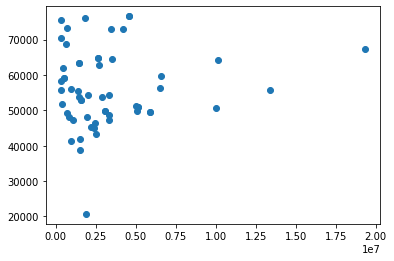

In [291]:
plt.scatter(us_census['Female'],us_census['Income'] )
plt.show()

In [292]:
print( us_census['Female'])

0     2489527.0
1      349215.0
2     3342840.0
3     1506295.0
4    19334329.0
5     2630239.0
0     2630239.0
1     1841615.0
2      478041.0
3      340810.0
4    10045763.0
5     5123362.0
0     5123362.0
1      696428.0
2      806083.0
3     6556862.0
4     3333382.0
5     1558931.0
0     1558931.0
1     1453125.0
2     2233145.0
3     2364097.0
4      679019.0
5           NaN
0           NaN
1     3455936.0
2     5038598.0
3     2727005.0
4     1536358.0
5     3081445.0
0     3081445.0
1           NaN
2      939759.0
3     1390901.0
4      670717.0
5     4561386.0
0     4561386.0
1     1051703.0
2    10131373.0
3     5049925.0
4      353677.0
5     5913084.0
0     5913084.0
1     1942789.0
2     1990780.0
3     6534215.0
4     1869213.0
5      543273.0
0      543273.0
1     2455167.0
2      419713.0
3     3331859.0
4    13367298.0
5     1444150.0
0     1444150.0
1      318031.0
2     4195682.0
3     3497739.0
4      937789.0
5     2890732.0
Name: Female, dtype: float64


In [293]:
us_census['Female'] = us_census['Female'].fillna(us_census['TotalPop']-us_census['Male'])

In [294]:
print(us_census['Female'])

0     2489527.0
1      349215.0
2     3342840.0
3     1506295.0
4    19334329.0
5     2630239.0
0     2630239.0
1     1841615.0
2      478041.0
3      340810.0
4    10045763.0
5     5123362.0
0     5123362.0
1      696428.0
2      806083.0
3     6556862.0
4     3333382.0
5     1558931.0
0     1558931.0
1     1453125.0
2     2233145.0
3     2364097.0
4      679019.0
5     3057895.0
0     3057895.0
1     3455936.0
2     5038598.0
3     2727005.0
4     1536358.0
5     3081445.0
0     3081445.0
1      504536.0
2      939759.0
3     1390901.0
4      670717.0
5     4561386.0
0     4561386.0
1     1051703.0
2    10131373.0
3     5049925.0
4      353677.0
5     5913084.0
0     5913084.0
1     1942789.0
2     1990780.0
3     6534215.0
4     1869213.0
5      543273.0
0      543273.0
1     2455167.0
2      419713.0
3     3331859.0
4    13367298.0
5     1444150.0
0     1444150.0
1      318031.0
2     4195682.0
3     3497739.0
4      937789.0
5     2890732.0
Name: Female, dtype: float64


In [295]:
us_census.drop_duplicates(inplace=True)

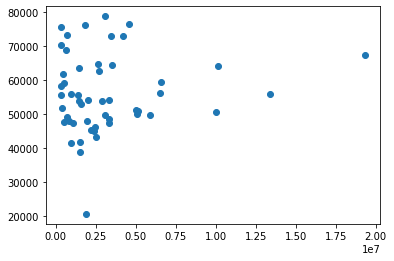

In [296]:
plt.scatter(us_census['Female'],us_census['Income'] )
plt.show()

In [297]:
us_census.columns

Index(['State', 'TotalPop', 'Hispanic', 'White', 'Black', 'Native', 'Asian',
       'Pacific', 'Income', 'GenderPop', 'Male', 'Female'],
      dtype='object')

In [298]:
us_census[['Hispanic', 
           'White', 
           'Black', 
           'Native', 
           'Asian',
           'Pacific']] = us_census[['Hispanic', 
                                    'White',
                                    'Black', 
                                    'Native',
                                    'Asian', 
                                    'Pacific']].replace({'%': ''}, regex=True).astype(float)

In [299]:
print(us_census[['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific']])

    Hispanic      White      Black     Native      Asian   Pacific
0   3.751616  61.878656  31.252976   0.453231   1.050255  0.034354
1   5.909581  60.910180   2.848503  16.391018   5.450299  1.058683
2  29.565921  57.120000   3.850987   4.355066   2.876579  0.167632
3   6.215474  71.137810  18.968759   0.522920   1.142336  0.146861
4  37.291875  40.215789   5.677396   0.405292  13.052234  0.351410
5  20.784380  69.895572   3.546377   0.573833   2.661997       NaN
1  15.604831  67.677053  10.348068   0.126208   4.021981  0.018599
2   8.824766  64.632710  20.743925   0.259813   3.268692       NaN
3   9.165922  33.103911  51.776536   0.200559   3.383240  0.029609
4  21.338543  59.083749  15.165676   0.210451   2.283174  0.051510
5   8.418242  54.286306  32.088298   0.187583   3.097649  0.046602
1   9.186709  25.032278   2.052848   0.144937  36.592089  8.758861
2  11.505369  83.136242   0.566779   1.468121   1.135906  0.127181
3  15.601734  60.859807  17.108411   0.118427   4.475377  0.02

In [304]:
sum_of_columns = us_census[['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific']].sum(axis=1)
threshold = 98.5
us_census['Pacific'] = us_census['Pacific'].fillna(threshold-sum_of_columns)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000B5850922C8>,
      dtype=object)

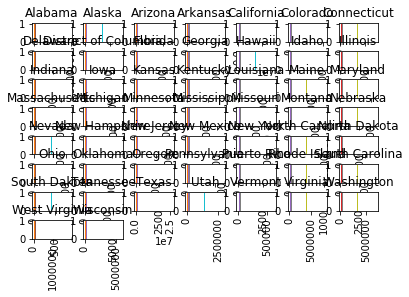

In [328]:
us_census.hist(column=['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific'],
               by=us_census['State'])

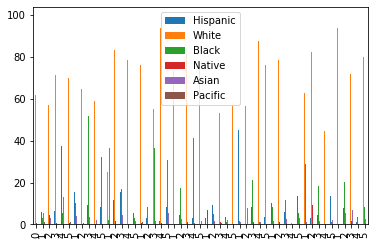

In [339]:
us_census[['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific']].plot.bar()